## **1.Dataset**    
->Using COMPAS dataset , COMPAS = Correctional Offender Management Profiling for Alternative Sanctions  
->link for accessing dataset : [Dataset_Github](https://www.propublica.org/article/how-we-analyzed-the-compas-recidivism-algorithm/)  

### ->**What is the dataset about?**  
    ---> It is basically a real time record of people who committed some crime in the past  
    ---> This tool predicts the likelihood of an individuals reoffending  
    ---> it is more likely to classify Black defendants as high-risk while being less accurate for White defendants  
    
### ->**Parameters of dataset**  
   ##### **name**	                          Name of the defendant  
   ##### **sex**	                          Gender of the individual (Male/Female)  
   ##### **age**	                          Age of the defendant  
   ##### **age_cat**	                      Age category (25 or younger, 26-45, 45+)  
   ##### **race**	                          Race of the individual (e.g., African-American, Caucasian)  
   ##### **decile_score**	                  COMPAS risk score (1-10)  
   ##### **score_text**	                  Risk category (Low, Medium, High)  
   ##### **c_charge_degree**	              Charge severity (Misdemeanor/Felony)  
   ##### **c_charge_desc**	              Description of the charge  
   ##### **priors_count**	                  Number of prior offenses  
   ##### **days_b_screening_arrest**	      Days between arrest and COMPAS screening  
   ##### **is_recid**	                      Whether the person reoffended (1 = Yes, 0 = No)  
   ##### **two_year_recid**	              Whether the person reoffended within two years  
   ##### **r_charge_degree**	              Degree of the recidivist offense  
   
### ->**BIAS**  
    gender-bias:Males are classified as higher risk compared to females  
    racial-bias:  Black defendants are more likely to be labeled as high risk even when they do not reoffend  
    accuracy: White defendants who do reoffend are more likely to be labeled as low risk

## **2.Tools used**  
1.Fairlearn  [docs](https://fairlearn.org/)  
2.AIF 360    [docs](https://aif360.res.ibm.com/resources)

## **3.Algorithms**  
**1.LogisticRegression** = a supervised learning algorithm used for binary and multi-class classification, predicts the probability of a class  
**2.RandomForestClassifier** = builds multiple decision trees and combines their results to improve accuracy and reduce overfitting  
**3.IsolationForest** = an anomaly detection algorithm that isolates outliers by recursively splitting the data

1.train_test_split from sklearn.model_selection -> Splits the dataset into training and testing sets

2.StandardScaler from sklearn.preprocessing ->StandardScaler helps by scaling all features to have a mean of 0 and a standard deviation of 1. This makes sure that all features contribute equally to the model.

3.LogisticRegression from sklearn.linear_model

4.RandomForestClassifier and IsolationForest from sklearn.ensemble

5.accuracy_score from sklearn.metrics

# bias detection
**1.FAIRLEARN**

  (i)**demographic_paritiy_difference from fairlearn.metrics** -> Measures the difference in positive outcome rates across demographic groups.

  (ii)**equalized_odds_difference from fairlearn.metrics** ->Measures the difference in true positive and false positive rates across groups.


**2.AIF 360**

  (i)**StandardDataset from aif360.datasets** ->A standardized format to load datasets for fairness analysis Prepares data for use with fairness algorithms in AIF360

  (ii)**BinaryLabelDatasetMetric from aif360.metrics** ->Computes statistics like class imbalance and disparate impact for binary classification datasets

  (iii)**ClassificationMetric from aif360.metrics** ->Evaluates fairness-aware models using accuracy, precision, recall, and fairness metrics

#bias mitigation
**1.FAIRLEARN**

  (i)**DemographicParitiy from fairlearn.reductions** ->Ensures that different demographic groups (e.g., gender, race) have similar predicted outcomes

  (ii)**EqualizedOdds from fairlearn.reductions** ->Ensures equal true positive and false positive rates across different demographic groups

  (iii)**ExponentiatedGradient from fairlearn.reductions** ->A technique to optimize models while enforcing fairness constraints

**2.AIF 360**

  (i)**Reweighing from aif360.algorithms.preprocessing** ->A preprocessing technique that assigns different weights to instances from different demographic groups to ensure fairness

  (ii)**AdversarialDebiasing from aif360.algorithms.inprocessing** ->A deep learning-based method that trains a model while minimizing bias using an adversarial approach


**tensorflow** ->Required for AdversarialDebiasing, which uses deep learning techniques, Provides GPU acceleration for faster model training

In [ ]:
# intalling all the required libraries
!pip install numpy pandas scikit-learn fairlearn aif360 tensorflow seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 10.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
from fairlearn.metrics import demographic_parity_difference, equalized_odds_difference
from fairlearn.reductions import ExponentiatedGradient, DemographicParity

In [ ]:
from aif360.datasets import StandardDataset
from aif360.metrics import ClassificationMetric
from aif360.algorithms.preprocessing import Reweighing
import tensorflow as tf

!pip install "aif360[inFairness]"

pip install 'aif360[inFairness]'


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Loading the dataset
from google.colab import files
def load_dataset():
  uploaded = files.upload()
  filename = list(uploaded.keys())[0]
  df=pd.read_csv(filename)
  df=df[['age','sex','race','priors_count','two_year_recid','c_charge_degree']]
  df=pd.get_dummies(df,columns=['sex','race','c_charge_degree'],drop_first=True)
  return df


In [ ]:
# split the dataset into test and train data and scale it
def standard_split(df):
  x=df.drop(columns=['two_year_recid'])
  y=df['two_year_recid']
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
  scaler = StandardScaler()
  x_train = scaler.fit_transform(x_train)
  x_test=scaler.transform(x_test)
  return x_train,x_test,y_train,y_test,df

In [ ]:
# Training The models
def model_training(x_train,x_test,y_train,y_test):
  models={
      "Logistic Regression": LogisticRegression(),
      "Random Forest": RandomForestClassifier(),
      "Isolation Forest": IsolationForest()
  }
  results={}
  for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    results[name]=accuracy_score(y_test,y_pred)
  return models,results

In [ ]:
#Bias detection and mitigation using Fairlearn Library

def bias_fairlearn(models,x_train,x_test,y_train,y_test):
  bias_metrics={}
  for name,model in models.items():

    exp_grad=ExponentiatedGradient(model,constraints=DemographicParity())

    exp_grad.fit(x_train,y_train,sensitive_features=x_train[:,0])
    y_fair_pred=exp_grad.predict(x_test)

    dpd_before=demographic_parity_difference(y_test,y_fair_pred,sensitive_features=x_test[:,0])
    eod_before=equalized_odds_difference(y_test,y_fair_pred,sensitive_features=x_test[:,0])

    dpd_after=demographic_parity_difference(y_test,y_fair_pred,sensitive_features=x_test[:,0])
    eod_after=equalized_odds_difference(y_test,y_fair_pred,sensitive_features=x_test[:,0])

    bias_score_before = (dpd_before + eod_before) / 2
    bias_score_after = (dpd_after + eod_after) / 2

    acc_before = accuracy_score(y_test, model.predict(x_test))
    acc_after = accuracy_score(y_test, y_fair_pred)

    bias_metrics[name] = {
            "bias_score_before": bias_score_before,
            "bias_score_after": bias_score_after,
            "acc_before": acc_before,
            "acc_after": acc_after
        }


  return bias_metrics

In [ ]:
# Bias detection and mitigation using AIF360

def bias_aif360(df, models, x_train, x_test,y_train, y_test):
    privileged_groups = [{'race_Asian': 1}]
    unprivileged_groups = [{'race_Asian': 0}]

    dataset = StandardDataset(df, label_name='two_year_recid', protected_attribute_names=['race_Asian'], privileged_classes=[[1]],favorable_classes=[1])

    bias_metrics = {}

    for name, model in models.items():

        model.fit(x_train, y_train)
        y_pred_before = model.predict(x_test)


        metric_before = ClassificationMetric(dataset, dataset, privileged_groups=privileged_groups, unprivileged_groups=unprivileged_groups)
        dpd_before = metric_before.statistical_parity_difference()
        eod_before = metric_before.equal_opportunity_difference()
        bias_score_before = (dpd_before + eod_before) / 2


        reweighing = Reweighing(privileged_groups=privileged_groups, unprivileged_groups=unprivileged_groups)
        dataset_transf = reweighing.fit_transform(dataset)


        model.fit(x_train, y_train)
        y_pred_after = model.predict(x_test)


        metric_after = ClassificationMetric(dataset_transf, dataset_transf, privileged_groups=privileged_groups, unprivileged_groups=unprivileged_groups)
        dpd_after = metric_after.statistical_parity_difference()
        eod_after = metric_after.equal_opportunity_difference()
        bias_score_after = (dpd_after + eod_after) / 2


        acc_before = accuracy_score(y_test, y_pred_before)
        acc_after = accuracy_score(y_test, y_pred_after)

        bias_metrics[name] = {
            "bias_score_before": bias_score_before,
            "bias_score_after": bias_score_after,
            "acc_before": acc_before,
            "acc_after": acc_after
        }

    return bias_metrics


In [ ]:
# Displaying results
print("upload the dataset\n")
df = load_dataset()

print("splitting the dataset into training and testing data\n")
x_train, x_test, y_train, y_test, df = standard_split(df)

print("Training the models\n")
models, accuracy_results = model_training(x_train, x_test, y_train, y_test)

print("Bias detection and mitigation using FAIRLEARN\n")
fairlearn_results = bias_fairlearn(models,x_train,x_test,y_train, y_test)

print("Bias detection and mitigation using AIF360\n")
aif360_results = bias_aif360(df,models,x_train,x_test,y_train,y_test)

# Displaying results
print("Fairlearn Results:")
for model, results in fairlearn_results.items():
   print(f"{model}: \nBias Score Before: {results['bias_score_before']}, \nBias Score After: {results['bias_score_after']}, \nAccuracy Before: {results['acc_before']}, \nAccuracy After: {results['acc_after']}")
   print("\n")
print("\nAIF360 Results:")
for model, results in aif360_results.items():
    print(f"{model}: \nBias Score Before: {results['bias_score_before']}, \nBias Score After: {results['bias_score_after']}, \nAccuracy Before: {results['acc_before']}, \nAccuracy After: {results['acc_after']}")
    print("\n")

upload the dataset



Saving compas-scores-two-years.csv to compas-scores-two-years (1).csv
splitting the dataset into training and testing data

Training the models

Bias detection and mitigation using FAIRLEARN



/usr/local/lib/python3.11/dist-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:256: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.gammas[h_idx] = h_gamma
/usr/local/lib/python3.11/dist-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:257: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.lambdas[h_idx] = lambda_vec.copy()
/usr/local/lib/python3.11/dist-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:256: PerformanceWarning: DataFrame is highly fragmented.  This 

Bias detection and mitigation using AIF360



/usr/local/lib/python3.11/dist-packages/aif360/datasets/standard_dataset.py:122: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[priv, attr] = privileged_values[0]


Fairlearn Results:
Logistic Regression: 
Bias Score Before: 1.0, 
Bias Score After: 1.0, 
Accuracy Before: 0.6888426888426888, 
Accuracy After: 0.5266805266805267


Random Forest: 
Bias Score Before: 1.0, 
Bias Score After: 1.0, 
Accuracy Before: 0.6396396396396397, 
Accuracy After: 0.6098406098406098


Isolation Forest: 
Bias Score Before: 0.9015151515151515, 
Bias Score After: 0.9015151515151515, 
Accuracy Before: 0.288981288981289, 
Accuracy After: 0.5169785169785169



AIF360 Results:
Logistic Regression: 
Bias Score Before: 0.08507814675577832, 
Bias Score After: 0.0, 
Accuracy Before: 0.6888426888426888, 
Accuracy After: 0.6888426888426888


Random Forest: 
Bias Score Before: 0.08507814675577832, 
Bias Score After: 0.0, 
Accuracy Before: 0.6444906444906445, 
Accuracy After: 0.6354816354816355


Isolation Forest: 
Bias Score Before: 0.08507814675577832, 
Bias Score After: 0.0, 
Accuracy Before: 0.30561330561330563, 
Accuracy After: 0.3097713097713098




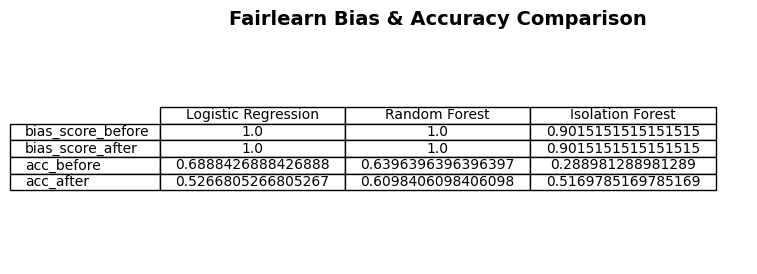

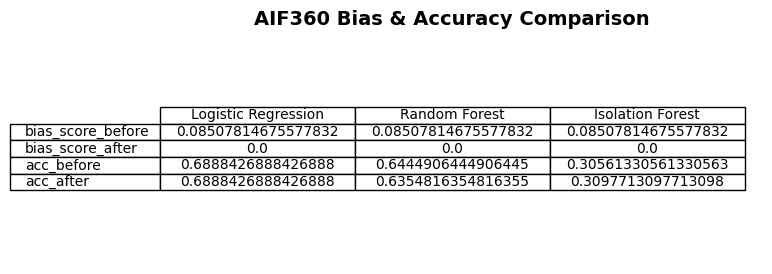

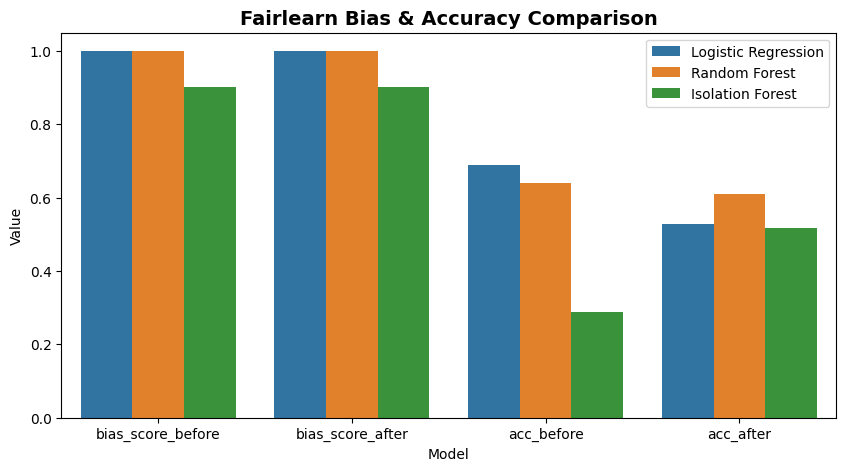

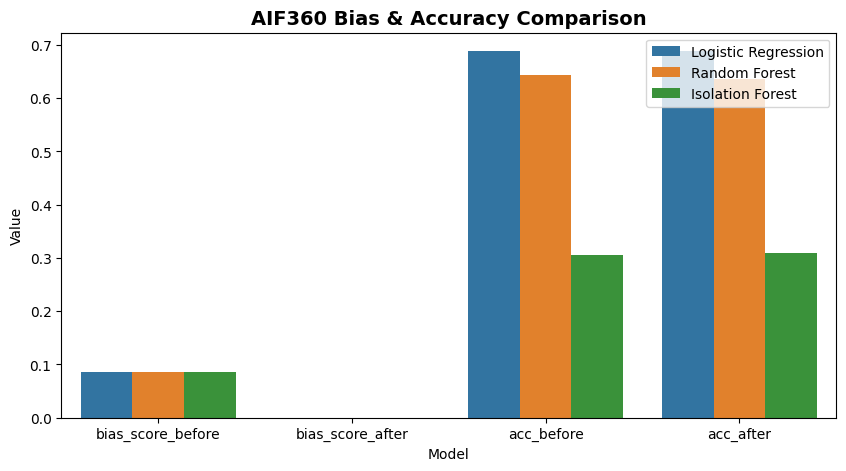

In [ ]:
fairlearn_results_df = pd.DataFrame(fairlearn_results)
aif360_results_df = pd.DataFrame(aif360_results)

#plotting the comparision table
def plot_table(df, title):
    fig, ax = plt.subplots(figsize=(8, 3))
    ax.set_title(title, fontsize=14, fontweight="bold")
    ax.axis("off")

    table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index,
                     cellLoc="center", loc="center")
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width([0, 1, 2, 3])

    plt.show()

#plotting the graphs
def plot_comparison(df, title):
    df_melted = df.reset_index().melt(id_vars="index", var_name="Metric", value_name="Value")

    plt.figure(figsize=(10, 5))
    sns.barplot(x="index", y="Value", hue="Metric", data=df_melted)

    plt.title(title, fontsize=14, fontweight="bold")
    plt.xlabel("Model")
    plt.ylabel("Value")
    plt.legend(loc="upper right")

    plt.show()


plot_table(fairlearn_results_df, "Fairlearn Bias & Accuracy Comparison")
plot_table(aif360_results_df, "AIF360 Bias & Accuracy Comparison")


plot_comparison(fairlearn_results_df, "Fairlearn Bias & Accuracy Comparison")
plot_comparison(aif360_results_df, "AIF360 Bias & Accuracy Comparison")


In [ ]:
# download dataset
